In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import community as community_louvain

In [24]:
# Read datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# For simplicity, let's combine them here, but you might want to keep them separate
data = pd.concat([train, test])

In [25]:
# Use TF-IDF to vectorize texts
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Build the graph
G = nx.Graph()
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim)):
        if cosine_sim[i][j] > 0.5:  # Threshold for similarity
            G.add_edge(i, j, weight=cosine_sim[i][j])


In [21]:
# Apply the Louvain method
partition = community_louvain.best_partition(G)

# Add the community info to your data
data['community'] = data.index.map(partition)

# View the result
print(data.head())


                                                text      category  community
0                     I am still waiting on my card?  card_arrival        0.0
1  What can I do if my card still hasn't arrived ...  card_arrival       17.0
2  I have been waiting over a week. Is the card s...  card_arrival        0.0
3  Can I track my card while it is in the process...  card_arrival        2.0
4  How do I know if I will get my card, or if it ...  card_arrival        3.0


/tmp/ipykernel_1758/1331500085.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


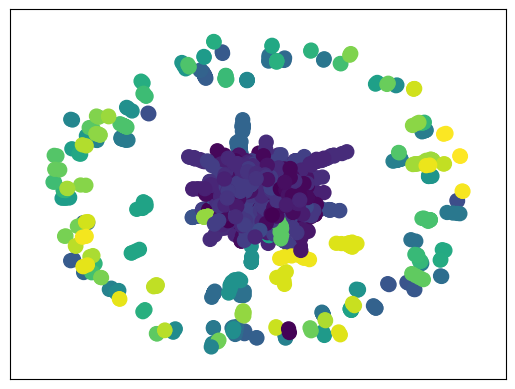

In [26]:
# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
# color nodes by their community
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()